In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer

In [2]:
dfp = pd.read_csv('./Data/student-por.csv', sep = ';')

In [3]:
dfp.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

In [5]:
dfp.Medu = pd.Categorical(dfp.Medu)


dfp[['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
   'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']] = pd.Categorical(dfp[['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
   'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']])


In [6]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null object
Fedu          649 non-null object
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null object
studytime     649 non-null object
failures      649 non-null object
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null object
freetime      649 non-null object
goout         649 non-null object
Dalc        

In [7]:
#numeric variables are age and absences 
#others are categorical

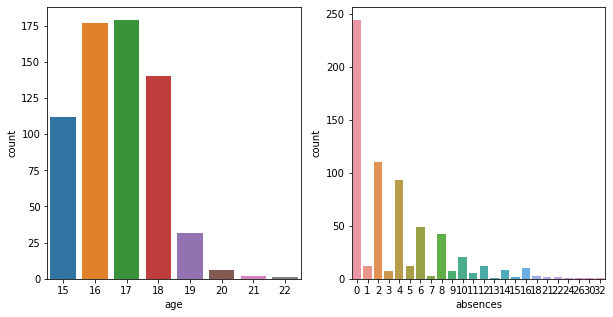

In [8]:
fig1, ax = plt.subplots(1, 2, figsize = (10,5))
sns.countplot(dfp['age'], ax = ax[0])
sns.countplot(dfp['absences'], ax = ax[1])

In [9]:
X = dfp.iloc[:, :30]#.values
y = dfp.iloc[:, 30:]#.values

In [10]:
X.shape

(649, 30)

In [11]:
X_onehot = pd.get_dummies(X, drop_first=True)
X_onehot.head()

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,1,0,0
1,17,2,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,15,6,0,0,1,1,1,0,0,0,...,1,0,1,0,0,0,1,1,1,0
3,15,0,0,0,1,0,1,1,0,0,...,1,0,0,1,0,1,1,1,1,1
4,16,0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,1,1,0,0


## For binary classification

In [12]:
y_b = y.copy()

In [13]:
y_b.values[y_b.values <= 9] = 0
y_b.values[y_b.values > 9] = 1

In [15]:
y_b['G3'].value_counts()

1    549
0    100
Name: G3, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_onehot, y_b, test_size = 0.2)
ytrain.shape

(519, 3)

In [18]:
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [19]:
Xtrain

array([[-0.57887037, -0.78036899,  1.39003719, ..., -2.96520705,
         0.55435078,  1.32137495],
       [ 1.08098445,  0.50742594, -0.71940521, ...,  0.33724458,
        -1.80391196, -0.75678747],
       [ 0.25105704, -0.78036899, -0.71940521, ...,  0.33724458,
         0.55435078, -0.75678747],
       ...,
       [-0.57887037,  0.07816096, -0.71940521, ...,  0.33724458,
         0.55435078,  1.32137495],
       [-1.40879778, -0.35110401, -0.71940521, ...,  0.33724458,
         0.55435078, -0.75678747],
       [-0.57887037, -0.78036899,  1.39003719, ...,  0.33724458,
        -1.80391196, -0.75678747]])

In [20]:
ytrain_g3 = ytrain.iloc[:,2]
ytest_g3 = ytest.iloc[:,2]
ytrain_g3.shape

(519,)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logreg = LogisticRegression().fit(Xtrain, ytrain_g3)

/Users/jolyndevis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
pred = logreg.predict(Xtest)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(ytest_g3, pred))

              precision    recall  f1-score   support

           0       0.42      0.24      0.30        21
           1       0.86      0.94      0.90       109

    accuracy                           0.82       130
   macro avg       0.64      0.59      0.60       130
weighted avg       0.79      0.82      0.80       130

